<h2 align = "center"> Evaluate Model Performance </h2> 

### Some Important Terms

* Actual labels, predicted labels and predicted class probability
* Class of our interest is known as the positive class, while all others are known as negative
* Overfitting is bad bc it is not generalized to the whole population but pick up spurious correlation between class and features instead.
* Learning curve: The test data performance varies across different sizes of training data. 
* Fitting graph: The training data performance varies across different complexity of the model. The size of training data is fixed 
* We can also visualize the performance for each fold to see the variability of the performance metric

* Nested Cross Validation: Use corss validation in the training data to find the complexity parameter and then use the complexity parameter on the test data to get the generalization of the performance. And then do the same thing for different models and then compare the model performance. Remember validation set is used to build up the model (finding the complexity parameter) and the test data is for comparing between different models.

<h3><font color = "red"> `predict` can only have `type` parameter either it is class or prob </font></h3>

In [1]:
setwd("E:/Personal/InterviewQuestion/Rscripts/Machine Learning with R, Second Edition_Code/Chapter 10")

In [2]:
sms_results <- read.csv("sms_results.csv")

In [3]:
library(gmodels)

In [5]:
head(sms_results)

,actual_type,predict_type,prob_spam,prob_ham
1,ham,ham,0,1
2,ham,ham,0,1
3,ham,ham,0.00016,0.99984
4,ham,ham,4e-05,0.99996
5,spam,spam,1,0
6,ham,ham,2e-04,0.9998


In [4]:
CrossTable(sms_results$actual_type, sms_results$predict_type)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  1390 

 
                        | sms_results$predict_type 
sms_results$actual_type |       ham |      spam | Row Total | 
------------------------|-----------|-----------|-----------|
                    ham |      1203 |         4 |      1207 | 
                        |    16.128 |   127.580 |           | 
                        |     0.997 |     0.003 |     0.868 | 
                        |     0.975 |     0.026 |           | 
                        |     0.865 |     0.003 |           | 
------------------------|-----------|-----------|-----------|
                   spam |        31 |       152 |       183 | 
                        |   106.377 |   841.470 |           | 
                        |     0.169 |     0.831 |     0.132 | 

In [62]:
library(caret)
dd = confusionMatrix(sms_results$predict_type, sms_results$actual_type, positive = "spam")

In [85]:
dd

Confusion Matrix and Statistics

          Reference
Prediction  ham spam
      ham  1203   31
      spam    4  152
                                          
               Accuracy : 0.9748          
                 95% CI : (0.9652, 0.9824)
    No Information Rate : 0.8683          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8825          
 Mcnemar's Test P-Value : 1.109e-05       
                                          
            Sensitivity : 0.8306          
            Specificity : 0.9967          
         Pos Pred Value : 0.9744          
         Neg Pred Value : 0.9749          
             Prevalence : 0.1317          
         Detection Rate : 0.1094          
   Detection Prevalence : 0.1122          
      Balanced Accuracy : 0.9136          
                                          
       'Positive' Class : spam            
                                          

#### Kappa

* Kappa Statistics: adjust accuracy by accounting for the possibility of a correct prediction by chance alone. This is especially important for datasets with a severe class imbalance, because a classifier can obtain high accuracy simply by always guessing the most frequent class. (every 0.2 a level of agreement from poor, fair, moderate, good and very good) 
(Pr(a) - Pr(e))/(1 - Pr(e)) decrease when the Pr(e) is large which is based on the random guess

Pr(a) is the actual accuracy and Pr(e) is the expected one, which means the probability they are actually this label (random guessing)  and they are predicted to be the label at the same time

In [6]:
library(vcd)

Loading required package: grid


In [7]:
Kappa(table(sms_results$actual_type, sms_results$predict_type))
#weighted kappa is used when tthere are varying degrees of agreement when the outcome is not binary

            value     ASE     z Pr(>|z|)
Unweighted 0.8825 0.01949 45.27        0
Weighted   0.8825 0.01949 45.27        0

#### Sensitivity & Specificity: balance betwee preditions that are overly conservative and overly aggressive

* Sensitivity, true positive rate, recall
* Specificity, true negative rate
Both based on the actual label

In [8]:
sensitivity(sms_results$predict_type, sms_results$actual_type, positive = "spam") #under caret
specificity(sms_results$predict_type, sms_results$actual_type, negative = "ham")

[1] 0.8306011

[1] 0.996686

#### Precision and Recall: when the class is highly unbalanced, it can zoom in the difference between two algorithms

In [9]:
library(caret)
posPredValue(sms_results$predict_type, sms_results$actual_type, positive = "spam") #precision
sensitivity(sms_results$predict_type, sms_results$actual_type, positive = "spam")

[1] 0.974359

[1] 0.8306011

#### F-measure

*  (2X PrecisionX Recall)/(recall + precision) [hARMONIC MEAN]
* hOWEVER, THIS ASSUMES THAT EQUAL WEIGHT SHOULD BE ASSIGNED TO PRECISION AND RECALL.

### Visualize the performance tradeoff

* ROC curve is called sensitivity/specificity plot
* the true positive rate at varying false positive thresholds.
* To create the curves, a classifier's predictions are sorted by the model's estimated probability of the positive class with the largest value first.Beginning the origin, each prediction's impact on the true positive rate and false positive rate will result in a curve tracing vertically (for a correct prediction) or horizontally(for an incorrect prediction)
* AUC: 0.5-0.6 no discrimination 0.9-10 outstanding 

In [10]:
library(ROCR)

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [11]:
pred <- prediction(predictions = sms_results$prob_spam, #The first must be the prediction and the second is the actual 
                   labels = sms_results$actual_type)

In [12]:
perf = performance(pred, measure = "tpr", x.measure = "fpr")

In [13]:
str(perf)

Formal class 'performance' [package "ROCR"] with 6 slots
  ..@ x.name      : chr "False positive rate"
  ..@ y.name      : chr "True positive rate"
  ..@ alpha.name  : chr "Cutoff"
  ..@ x.values    :List of 1
  .. ..$ : num [1:302] 0 0 0 0 0 ...
  ..@ y.values    :List of 1
  .. ..$ : num [1:302] 0 0.53 0.552 0.557 0.574 ...
  ..@ alpha.values:List of 1
  .. ..$ : num [1:302] Inf 1 1 1 1 ...


In [14]:
resultTable = cbind(unlist(perf@x.values), unlist(perf@y.values), unlist(perf@alpha.values))

In [15]:
head(resultTable)

0,0,Inf
0.0000000,0.5300546,1.0000000
0.0000000,0.5519126,0.9999900
0.000000,0.557377,0.999980
0.0000000,0.5737705,0.9999700
0.0000000,0.5956284,0.9999600


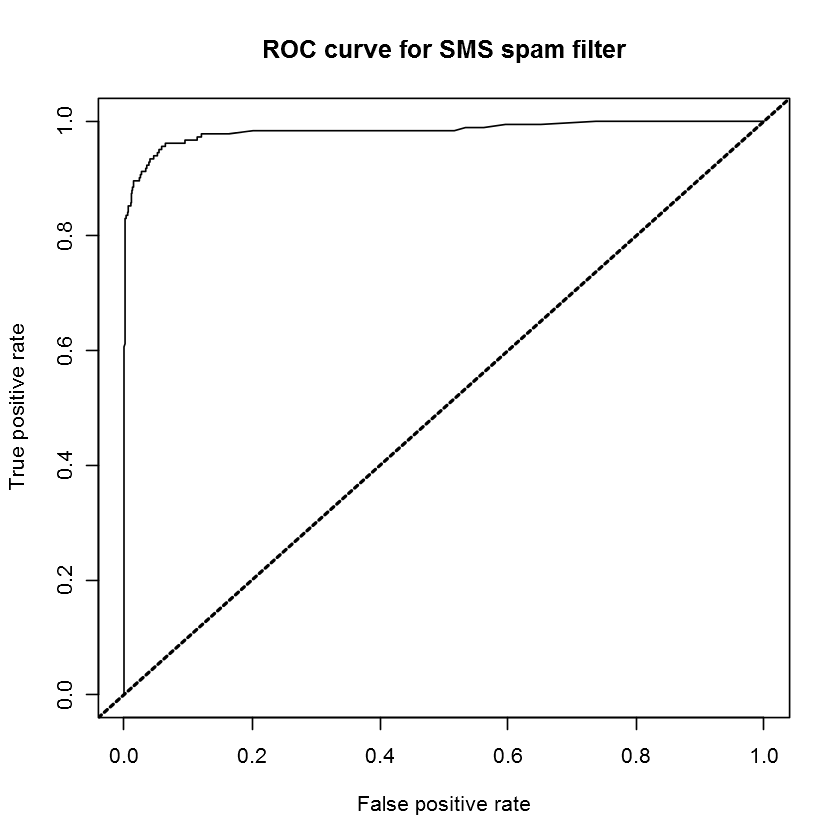

In [16]:
plot(perf, main = "ROC curve for SMS spam filter")
abline(a =0, b =1, lwd = 2, lty =2 )

In [15]:
perf.auc = performance(pred, measure = "auc")

In [16]:
str(perf.auc)

Formal class 'performance' [package "ROCR"] with 6 slots
  ..@ x.name      : chr "None"
  ..@ y.name      : chr "Area under the ROC curve"
  ..@ alpha.name  : chr "none"
  ..@ x.values    : list()
  ..@ y.values    :List of 1
  .. ..$ : num 0.984
  ..@ alpha.values: list()


In [17]:
unlist(perf.auc@y.values) #S4 objects hold information in positions known as slots

[1] 0.9835862

### Lift plot

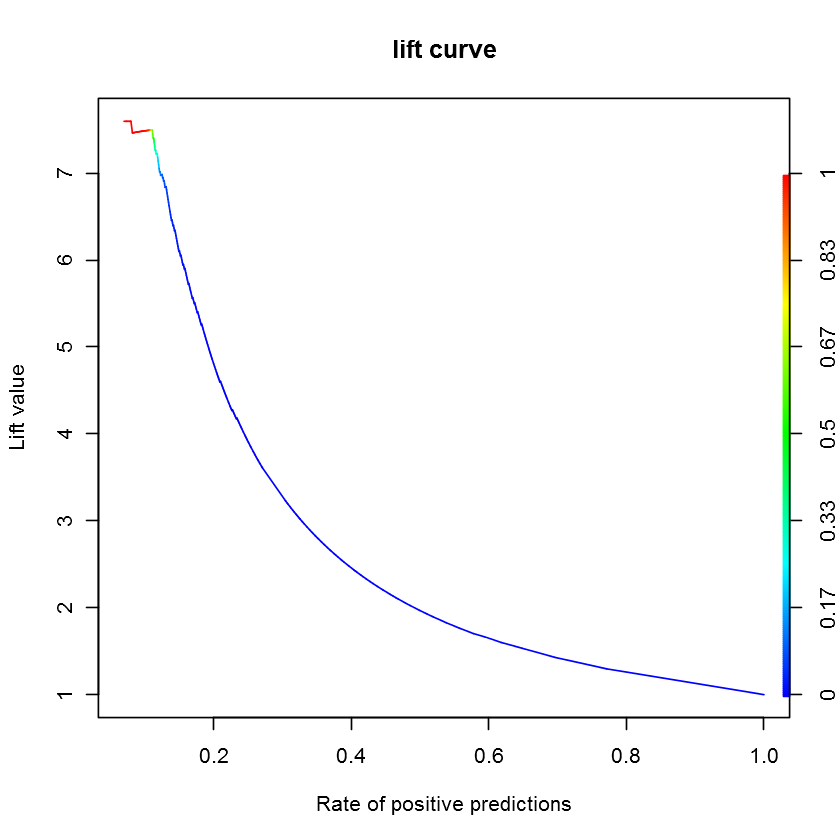

In [17]:
perf <- performance(pred,"lift","rpp")
plot(perf, main="lift curve", colorize=T)

In [ ]:
### Precision Recall Curve
perf <- performance(pred,"prec","tpr")
plot(perf, main="lift curve", colorize=T)

### Holdout Method 
* We need a validation set to avoid cherry picking. If we only base our decision on the test data, we just choose what is available for us. We should use a validation data for the iteration and tuning and use the test data just for a final report of future performance. 

* Problem:
1) Some sample may have too many or few difficult cases or outliers.
2) Can't fully utilize all the data

* A common practice is to retrain the model on the full set of data after a final model has been selected and evaluated 

In [6]:
# partitioning data
library(caret)
credit <- read.csv("credit.csv")

Loading required package: lattice
Loading required package: ggplot2


* Stratified Sampling is enabled

In [19]:
in_train <- createDataPartition(credit$default, p = 0.75, list = FALSE)
credit_train <- credit[in_train, ]
credit_test <- credit[-in_train, ]

### Cross Validation 

In [53]:
require(RCurl)
require(prettyR)

url <- "https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CleanCreditScoring.csv"
cs_data <- getURL(url)
cs_data <- read.csv(textConnection(cs_data))

In [54]:
classes <- cs_data[, "Status"]
predictors <- cs_data[, -match(c("Status", "Seniority", "Time", "Age", "Expenses", 
    "Income", "Assets", "Debt", "Amount", "Price", "Finrat", "Savings"), colnames(cs_data))]

train_set <- createDataPartition(classes, p = 0.8, list = FALSE)

* Without tuning parameter

In [18]:
# 10-fold CV
folds <- createFolds(credit$default, k = 10) # The result is for each fold the id
str(folds)
credit01_test <- credit[folds$Fold01, ]
credit01_train <- credit[-folds$Fold01, ]

List of 10
 $ Fold01: int [1:100] 7 12 28 40 50 55 56 68 77 83 ...
 $ Fold02: int [1:100] 1 4 14 37 98 99 104 122 132 150 ...
 $ Fold03: int [1:100] 8 25 41 51 58 87 96 107 146 148 ...
 $ Fold04: int [1:100] 2 23 29 43 60 70 97 101 108 111 ...
 $ Fold05: int [1:100] 6 13 17 19 20 42 47 48 54 76 ...
 $ Fold06: int [1:100] 3 5 15 35 52 57 62 66 69 79 ...
 $ Fold07: int [1:100] 9 16 39 46 67 72 78 91 93 95 ...
 $ Fold08: int [1:100] 10 11 21 32 33 71 75 110 112 113 ...
 $ Fold09: int [1:100] 18 22 26 31 34 44 45 64 65 73 ...
 $ Fold10: int [1:100] 24 27 30 36 38 49 53 59 61 63 ...


In [103]:
library(caret)
library(C50)
credit <- read.csv("credit.csv")
set.seed(123)

## Change data and the label variable 
folds <- createFolds(credit$default, k = 10)
cv_results <- lapply(folds, function(x, data = credit) {
  train <- data[-x, ] #get the train data 
  test <- data[x, ] #get the test data 
  model <- randomForest(default ~ ., data = train, mtry = 3)
  pred <- predict(model, test)
  pred_response = predict(model, test, type = "prob")
  actual <- test$default
 #### Generate Confusion Matrix
  confusionmatrix = confusionMatrix(pred, actual, positive = "yes")
  allMetrics = confusionmatrix$byClass
  specificity = allMetrics['Specificity']
  recall = allMetrics['Sensitivity']
  precision = allMetrics['Pos Pred Value']
    
  #RMSE.model<- sqrt(mean((pred-actual)^2))
  #MAE.model <- mean(abs(pred-actual))

  result = data.frame(recall = recall, precision = precision, specificity = specificity)
})

In [101]:
cv_results_table = bind_rows(cv_results)

In [109]:
head(cv_results_table)

,recall,precision,specificity
1,0.3666667,0.6875000,0.9285714
2,0.4000000,0.6666667,0.9142857
3,0.2666667,0.6666667,0.9428571
4,0.4000000,0.7058824,0.9285714
5,0.5000000,0.7500000,0.9285714
6,0.5000000,0.8333333,0.9571429


In [110]:
library(tidyr)


Attaching package: 'tidyr'

The following object is masked from 'package:Matrix':

    expand

The following object is masked from 'package:RCurl':

    complete



In [113]:
cv_results_table_final = gather(cv_results_table, key = "metric")

In [114]:
cv_results_errorBar = cv_results_table_final %>% group_by(metric) %>% 
                                       summarise(metric_mean = mean(value, na.rm = TRUE),
                                                 metric_se = sd(value, na.rm = TRUE)/sqrt(n()) ) %>%
                                       mutate(lowerBound = metric_mean - metric_se, upperBound = metric_mean + metric_se)

In [115]:
plot1.0 = ggplot(cv_results_errorBar, aes(x=metric, y=metric_mean,, fill = metric)) + 
  geom_bar(position=position_dodge(), stat="identity") +
  geom_errorbar(aes(ymin=lowerBound, ymax=upperBound),
                width=.2,                    # Width of the error bars
                position=position_dodge(.9))

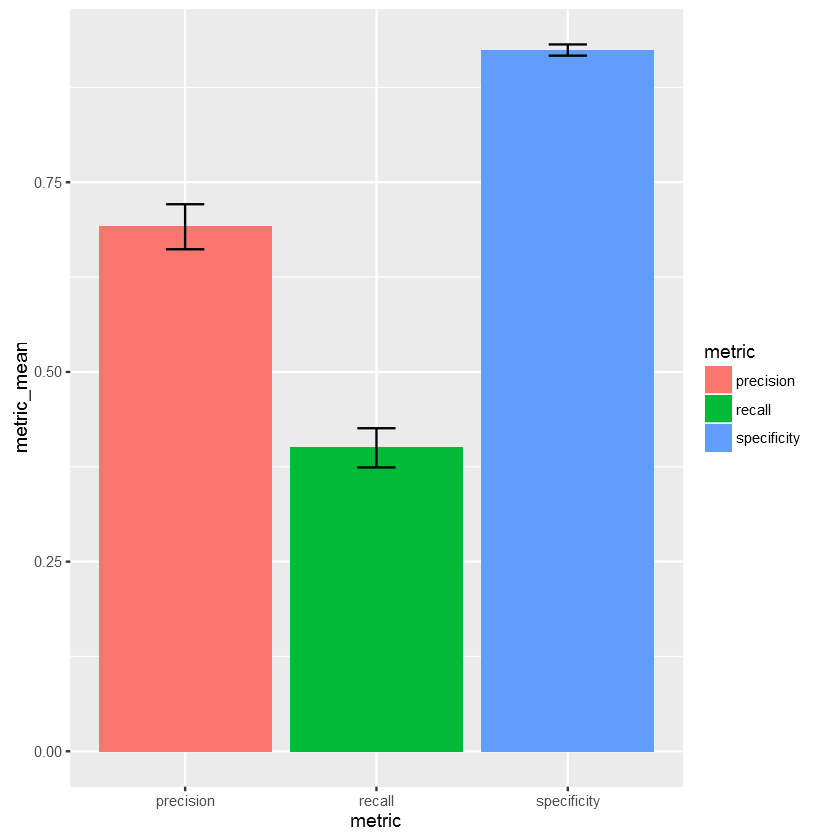

In [116]:
plot1.0

* Tuning the parameters

In [80]:
#### Customize the reporting function
sensitiveSummary <- function (data,
                        lev = NULL,
                        model = NULL) {
    
  dd = confusionMatrix(data$pred,data$obs, positive = "bad")
  out <-  dd$byClass['Sensitivity']
  names(out) <- "sensitivity"
  out
}


In [83]:
set.seed(123)

cs_data_train <- cs_data[train_set, ]
cs_data_test <- cs_data[-train_set, ]

# Define the tuned parameter
grid <- expand.grid(mtry = seq(4,16,4))

ctrl <- trainControl(method = "cv", number = 10, summaryFunction = twoClassSummary,classProbs = TRUE)

rf_fit <- train(Status ~ ., data = cs_data_train,
                    method = "rf",
                    preProcess = c("center", "scale"),
                    tuneGrid = grid,
                    trControl = ctrl,         
                   family= "binomial",
                   metric= "ROC" #define which metric to optimize metric='RMSE'
               )
rf_fit

Random Forest 

3558 samples
  26 predictor
   2 classes: 'bad', 'good' 

Pre-processing: centered (68), scaled (68) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 3202, 3202, 3202, 3202, 3203, 3202, ... 
Resampling results across tuning parameters:

  mtry  ROC        Sens   Spec     
   4    0.8338599  0.379  0.9464461
   8    0.8357191  0.446  0.9253370
  12    0.8377762  0.488  0.9171293
  16    0.8353038  0.507  0.9089246

ROC was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 12. 

In [125]:
whichTwoPct <- tolerance(rf_fit$results, metric = "ROC",
                         tol = 2, maximize = TRUE)

In [126]:
rf_fit$results[whichTwoPct,1:6]

,mtry,ROC,Sens,Spec,ROCSD,SensSD
1,4.00000000,0.83385987,0.37900000,0.94644608,0.01751692,0.05704774


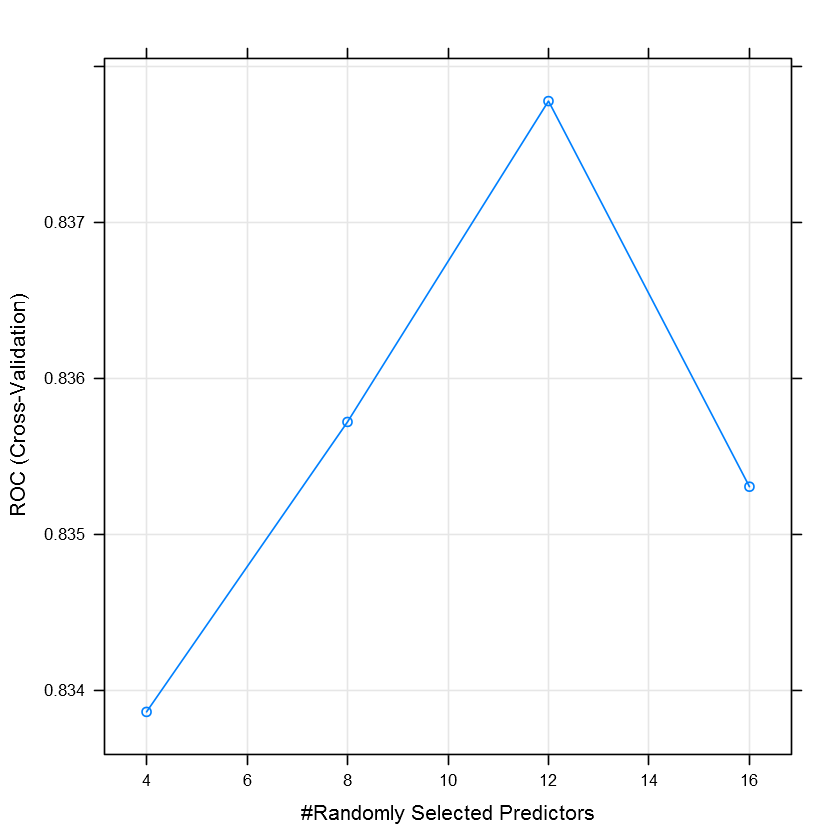

In [104]:
plot(rf_fit)

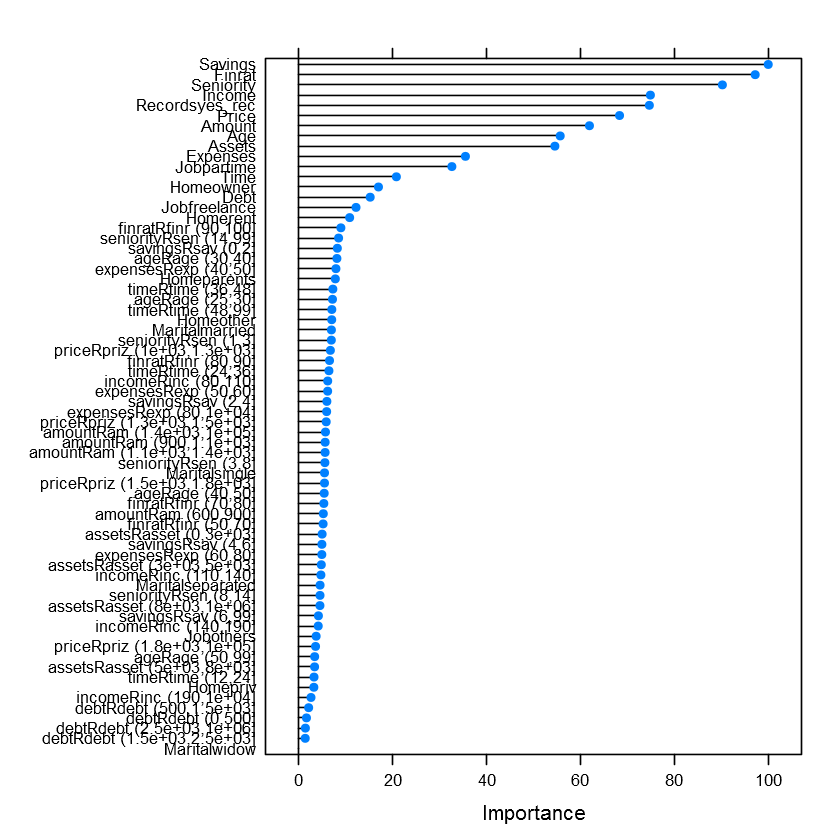

In [108]:
plot(varImp(rf_fit))